The purpose of this program:
- To create a model that can accurately predict the breed of specific dogs based on an image.

Libraries used:
- NumPy
- Pandas
- MatPlotLib
- CV2
- OS
- SciKit-Learn
- Tensorflow with Keras

In [1]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from tensorflow.keras.metrics import categorical_crossentropy

First, let's load in and view our data. I am going to also store the data in separate lists. 

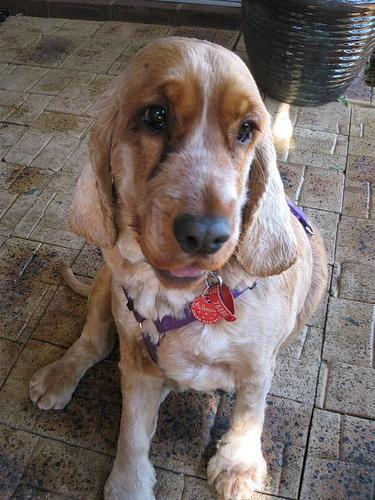

In [2]:
cocker_spaniel=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02067589-Cocker_Spaniel/'):
    im = Image.open('input/data/images/Images/chosen_images/n02067589-Cocker_Spaniel/' + file)
    cocker_spaniel.append(im)
display(random.choice(cocker_spaniel))

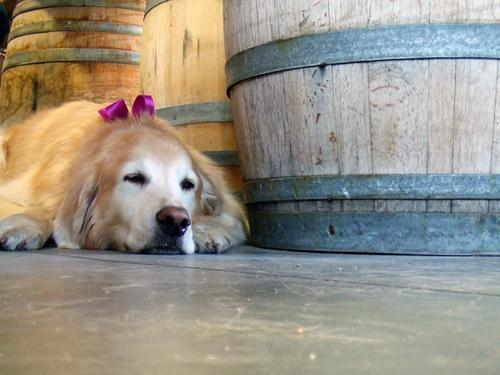

In [3]:
golden_retriever=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02073948-golden_retriever/'):
    im = Image.open('input/data/images/Images/chosen_images/n02073948-golden_retriever/' + file)
    golden_retriever.append(im)
display(random.choice(golden_retriever))

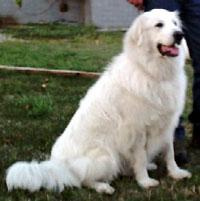

In [4]:
great_pyrenees=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02054938-great_pyrenees/'):
    im = Image.open('input/data/images/Images/chosen_images/n02054938-great_pyrenees/' + file)
    great_pyrenees.append(im)
display(random.choice(great_pyrenees))

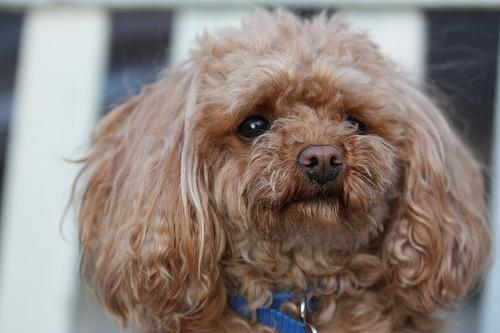

In [5]:
mini_poodle=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02054839-mini_poodle/'):
    im = Image.open('input/data/images/Images/chosen_images/n02054839-mini_poodle/' + file)
    mini_poodle.append(im)
display(random.choice(mini_poodle))

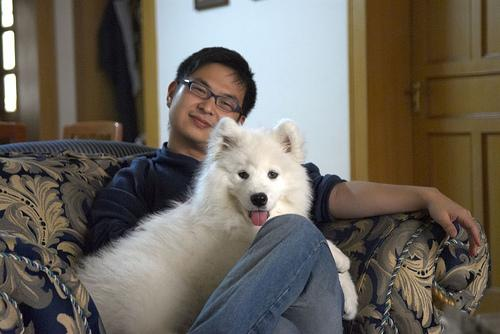

In [6]:
samoyed=[]
for file in os.listdir('input/data/images/Images/chosen_images/n0250839-samoyed/'):
    im = Image.open('input/data/images/Images/chosen_images/n0250839-samoyed/' + file)
    samoyed.append(im)
display(random.choice(samoyed))

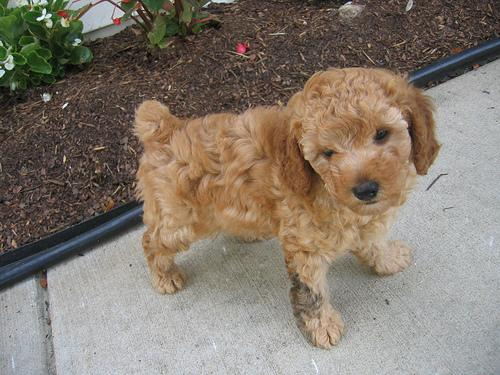

In [7]:
toy_poodle=[]
for file in os.listdir('input/data/images/Images/chosen_images/n0304958-toy_poodle/'):
    im = Image.open('input/data/images/Images/chosen_images/n0304958-toy_poodle/' + file)
    toy_poodle.append(im)
display(random.choice(toy_poodle))

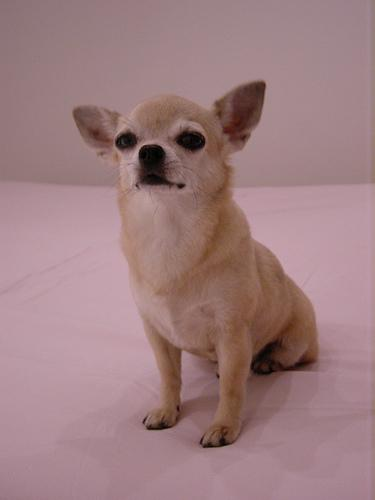

In [48]:
chihuahua=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02085620-Chihuahua//'):
    im = Image.open('input/data/images/Images/chosen_images/n02085620-Chihuahua//' + file)
    chihuahua.append(im)
display(random.choice(chihuahua))

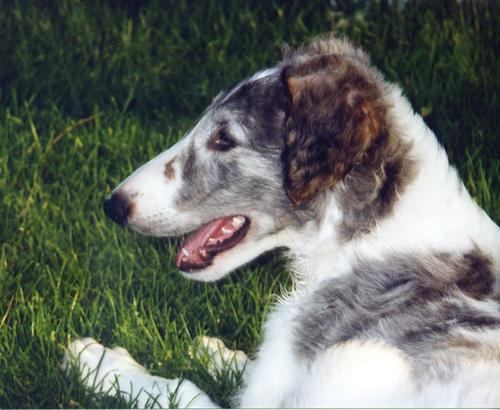

In [9]:
borzoi=[]
for file in os.listdir('input/data/images/Images/chosen_images/n02090622-borzoi//'):
    im = Image.open('input/data/images/Images/chosen_images/n02090622-borzoi/' + file)
    borzoi.append(im)
display(random.choice(borzoi))

The images are all different size, so let's create a function that can set a standard for the size of all of the images. 
This will make it so that our image data will have the quality needed so it can run correctly.

For landscape pictures, the dog's face will usually be in the middle, so we will just cut off the sides of the image. For portrait pictures, the dog's face will usually be at the top, so we will cut the bottom off.

In [10]:
for i in [borzoi,chihuahua,cocker_spaniel,toy_poodle,mini_poodle,great_pyrenees,samoyed,golden_retriever]:
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.LANCZOS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)

Let's see some edited images to make sure the dimensions are correct.

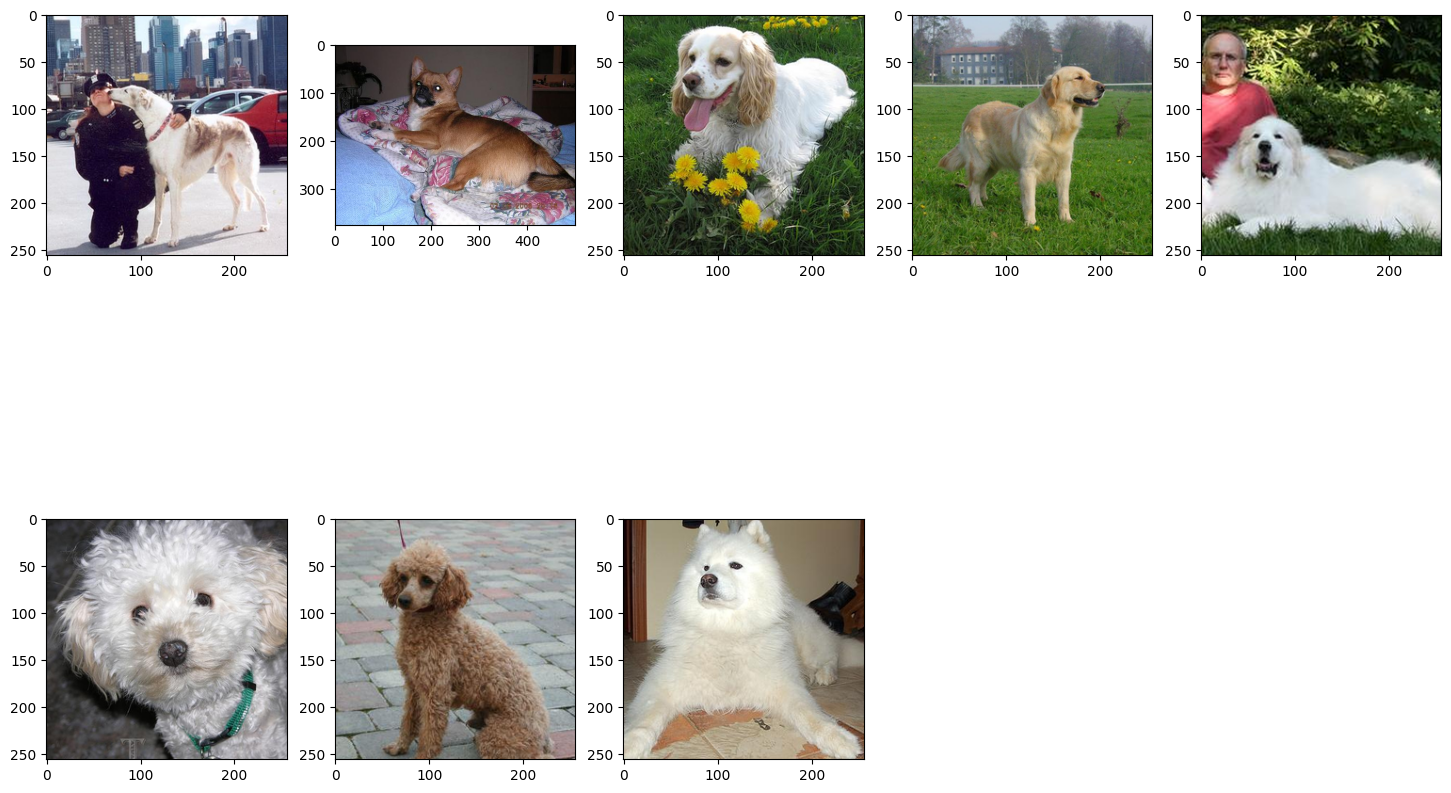

In [49]:
images = []
for i in [borzoi,chihuahua,cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]:
    images.append(random.choice(i))

height = max(8, int(len(images)/5) * 8)
plt.figure(figsize=(18, 12))

for i, image in enumerate(images):
    plt.subplot(int(len(images) / 5 + 1), 5, i + 1)
    plt.imshow(image)

Let's now pre-process our data. 
This next bit of code is the start of storing data for training a classification model. 'x' and 'y' are two lists that will store this data.
Next, we are using the 'x' list to convert each image into a NumPy array in order to change the data into a format that can be easily processed by machine learning libraries.
Our 'y' array will be used as a list of names of the breeds we have chosen to test for. We then use the LabelEncoder from SciKit-Learn libraries to convert the breed names into numerical labels. Machine learning algorithms work with numerical labels instead of character/text labels.

In [55]:
x = []
y = []

for i in [borzoi, chihuahua, cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]:
    for j in range(len(i)):
        ar = np.asarray(i[j])
        x.append(ar)
#x = np.array(x)

        
for i in range(8):
    lists = [borzoi, chihuahua, cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]
    names = ['borzoi','chihuahua','cocker_spaniel', 'golden_retriever', 'great_pyrenees', 'toy_poodle', 'mini_poodle', 'samoyed']
    for j in range(len(lists[i])):
        y.append(names[i])
        
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

Next, we need to program a function that can be used to create data generators for training and validation sets.
One of the first things we are going to set up is 'ImageDataGenerator'. This is used for data augumentation in order to increase the diversity of the training dataset. This will introduce various random transformations to our images that will allow for a more generalized model as a whole.
I also set the batch size to 32 in order to allow for a more generalized model.

In [28]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis=3)
    validation_images = np.expand_dims(validation_images, axis=3)
    
    print(training_images.shape)
    print(validation_images.shape)
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )
    
    train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 
    validation_datagen = ImageDataGenerator(rescale = 1./255)
    validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 
    return train_generator, validation_generator
    

In [29]:
test_size = 0.2
random_state = 42

X_train, X_test, y_test, y_train = train_test_split(x, y, test_size=test_size, random_state=random_state)

In [30]:
train_generator, validation_generator = train_val_generators(
    training_images = np.random.rand(7172, 256,256), 
    training_labels = np.random.randint(0,8,7172),
    validation_images = np.random.rand(7172, 28,28),
    validation_labels = np.random.randint(0,2,7172),
    )

(7172, 256, 256, 1)
(7172, 28, 28, 1)


In [47]:
model=Sequential()
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.0001),
             metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 28)      784       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 28)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 56)      14168     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 56)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 215264)            0         
                                                                 
 dropout_10 (Dropout)        (None, 215264)          

In [45]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [46]:
datagen = ImageDataGenerator(
      rescale=1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=1)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=1)

history = model.fit(train, epochs=50, validation_data=test)

Epoch 1/50
1214/1214 [==============================] - 27s 22ms/step - loss: 2.0535 - accuracy: 0.1985 - val_loss: 1.9556 - val_accuracy: 0.2074
Epoch 2/50
1214/1214 [==============================] - 31s 25ms/step - loss: 1.9342 - accuracy: 0.2446 - val_loss: 1.9086 - val_accuracy: 0.2148
Epoch 3/50
1214/1214 [==============================] - 28s 23ms/step - loss: 1.8873 - accuracy: 0.2727 - val_loss: 1.9141 - val_accuracy: 0.2074
Epoch 4/50
1214/1214 [==============================] - 28s 23ms/step - loss: 1.8566 - accuracy: 0.2891 - val_loss: 1.9010 - val_accuracy: 0.2222
Epoch 5/50
1214/1214 [==============================] - 29s 24ms/step - loss: 1.8223 - accuracy: 0.3040 - val_loss: 1.9194 - val_accuracy: 0.2519
Epoch 6/50
1214/1214 [==============================] - 27s 22ms/step - loss: 1.8128 - accuracy: 0.3114 - val_loss: 1.9166 - val_accuracy: 0.2741
Epoch 7/50
1214/1214 [==============================] - 27s 23ms/step - loss: 1.8059 - accuracy: 0.2974 - val_loss: 1.9072 -